In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import motra

In [6]:
fly = motra.parse("datasets/sample-trackfeat.xls")
fly.head()

,pos x,pos y,ori,major axis len,minor axis len,body area,fg area,img contrast,min fg dist,wing l x,...,ang_vel,min_wing_ang,max_wing_ang,mean_wing_length,axis_ratio,fg_body_ratio,contrast,dist_to_wall,fly_id,timestamp
0,783.857741,542.569038,2.704636,29.120054,10.639605,239.0,660.0,0.309538,62.817196,806.0,...,0.050744,0.034302,0.039607,1.950287,2.736949,2.761506,0.309538,3.578768,1,0.0000
1,783.493878,542.587755,2.706273,29.165685,10.884344,245.0,647.0,0.326223,61.131008,806.0,...,0.070921,0.037852,0.048828,1.969268,2.704425,2.675070,0.330280,3.578768,1,0.0333
2,783.277551,542.595918,2.710513,29.367216,10.790607,245.0,651.0,0.359137,60.299255,805.0,...,0.098216,0.038118,0.075285,1.970531,2.692419,2.651685,0.340643,3.646340,1,0.0667
3,783.553279,542.569672,2.707958,28.909874,10.921876,244.0,647.0,0.318077,62.128899,805.0,...,0.114703,0.037068,0.076717,1.961779,2.670243,2.637463,0.328618,3.578768,1,0.1000
4,783.735772,542.552846,2.702509,29.171824,10.944310,246.0,637.0,0.319184,62.817196,806.0,...,0.133684,0.038944,0.061583,1.958673,2.645382,2.614129,0.320573,3.578768,1,0.1333


In [7]:
fly.dropna(subset=["pos x", "pos y"], how="all", inplace=True)

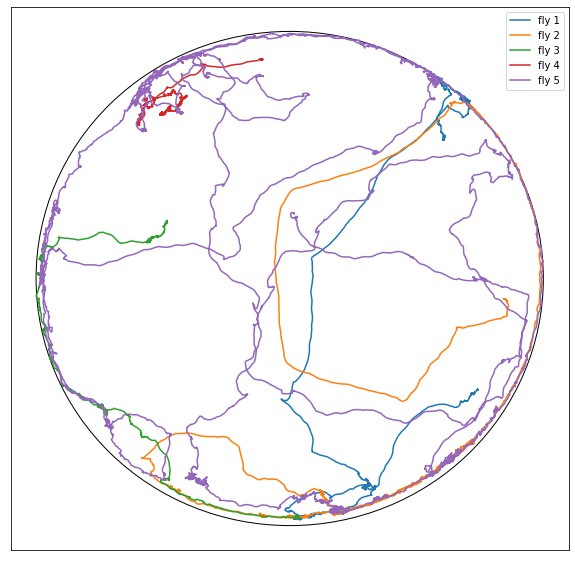

In [8]:
arena_1 = fly[fly["fly_id"] < 6] # flies that belong to arena 1. 
                                 # The dataset needs a column indicating 
                                 # which arena the fly belongs to.
center_1, radius_1 = motra.arena(arena_1)
motra.arena_trajectory(arena_1, center_1, radius_1)

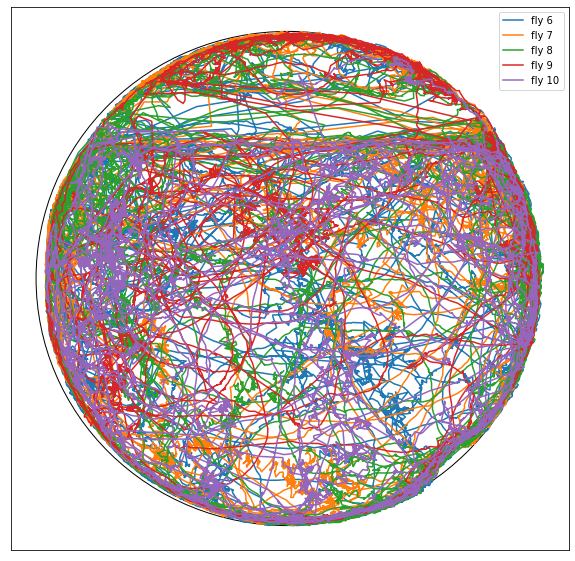

In [9]:
arena_2 = fly[fly["fly_id"] > 5] # flies that belong to arena 2. 
                                 # The dataset needs a column indicating 
                                 # which arena the fly belongs to.
center_2, radius_2 = motra.arena(arena_2)
motra.arena_trajectory(arena_2, center_2, radius_2)

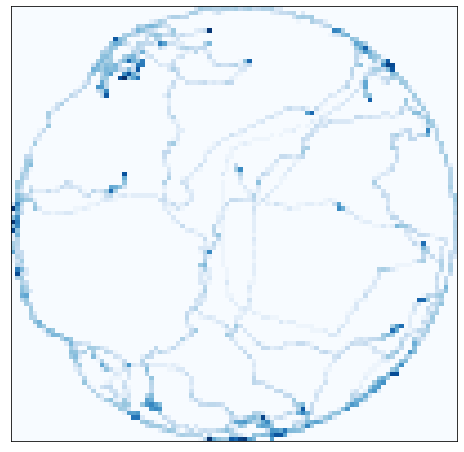

In [10]:
motra.heatmap(arena_1, center_1, radius_1, linthresh=5, cmap="Blues")

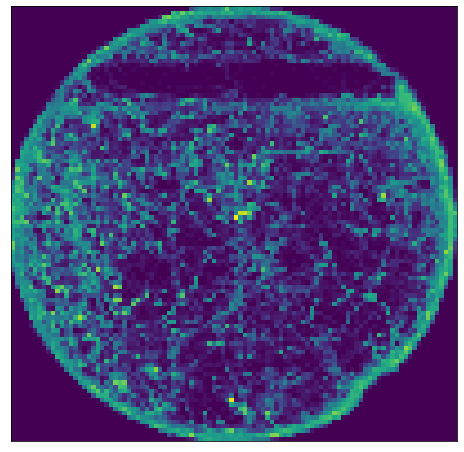

In [11]:
motra.heatmap(arena_2, center_2, radius_2, linthresh=20, cmap='viridis')

# Time distribution

In [16]:
time_distribution_by_quadrant = motra.time_distribution_by_quadrant(arena_1, center_1, radius_1)
time_distribution_by_quadrant

quadrant,0,1,2,3
fly_id,,,,
1,0.557787,0.000000,0.001356,0.440857
2,0.009363,0.000537,0.459506,0.530594
3,0.000000,0.699964,0.166377,0.133659
4,0.000000,1.000000,0.000000,0.000000
5,0.185741,0.254656,0.233500,0.326103


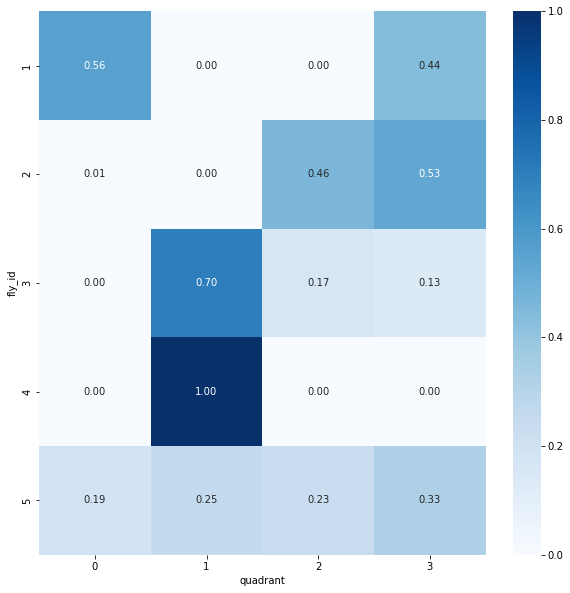

In [20]:
motra.graph_time_distribution_by_quadrant(time_distribution_by_quadrant)

# Statistics

In [53]:
stats_1 = motra.stats(arena_1)
stats_1["distance"] = motra.convert_to_mm(stats_1["distance"], radius=radius_1)
stats_1["velocity (per second)"] = motra.convert_to_mm(stats_1["velocity (per second)"], radius=radius_1)
stats_1.head()

,fly_id,timestamp,pos x,pos y,distance,velocity (per second)
0,1,0.0,783.857741,542.569038,NaN,NaN
1,1,1.0,783.473684,542.570850,0.337727,0.337727
2,1,2.0,783.455285,542.540650,0.371555,0.371555
3,1,3.0,783.338776,542.436735,0.205924,0.205924
4,1,4.0,783.546939,542.424490,0.171845,0.171845
...,...,...,...,...,...,...
6515,5,1299.0,738.343750,459.477679,1.092230,1.092230
6516,5,1300.0,734.775330,457.378855,0.955924,0.955924
6517,5,1301.0,738.185930,462.040201,1.266112,1.266112
6518,5,1302.0,747.887006,466.807910,1.655907,1.655907


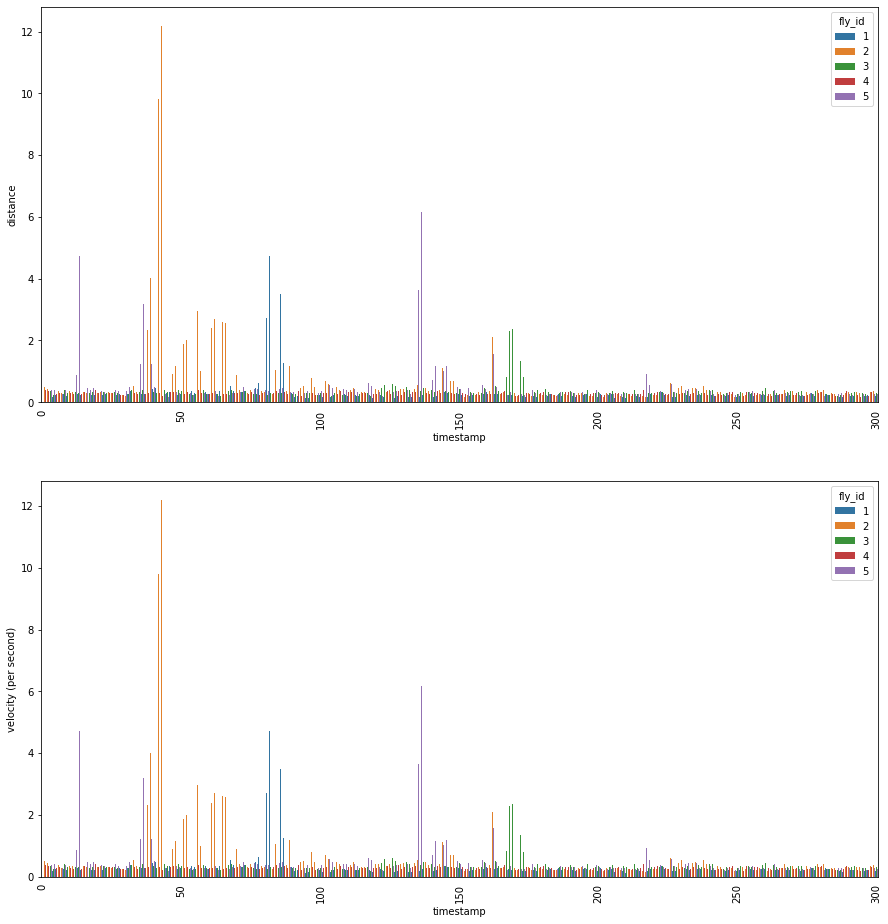

In [55]:
motra.visualize_stats(motra.sample_by_fly(stats_1, seconds=10), figsize=(15, 16), x_label_freq=30)

In [56]:
stats_2 = motra.stats(arena_2)
stats_2["distance"] = motra.convert_to_mm(stats_2["distance"], radius=radius_2)
stats_2["velocity (per second)"] = motra.convert_to_mm(stats_2["velocity (per second)"], radius=radius_2)
stats_2.head()

,fly_id,timestamp,pos x,pos y,distance,velocity (per second)
0,6,0.0,1442.095436,666.759336,NaN,NaN
1,6,1.0,1465.044000,671.444000,2.246532,2.246532
2,6,2.0,1466.307393,705.256809,3.106227,3.106227
3,6,3.0,1447.276515,753.602273,4.436636,4.436636
4,6,4.0,1435.560484,767.548387,1.867627,1.867627


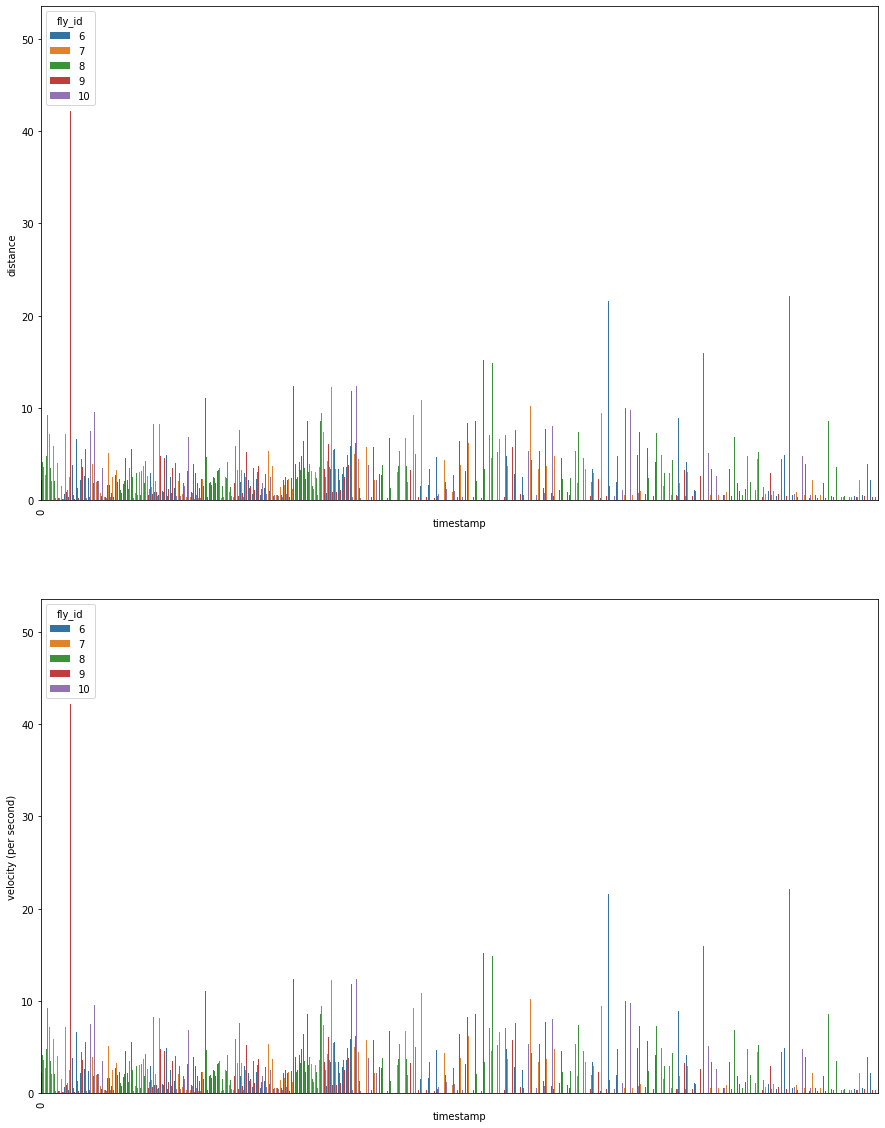

In [57]:
motra.visualize_stats(stats_2)

# Animation

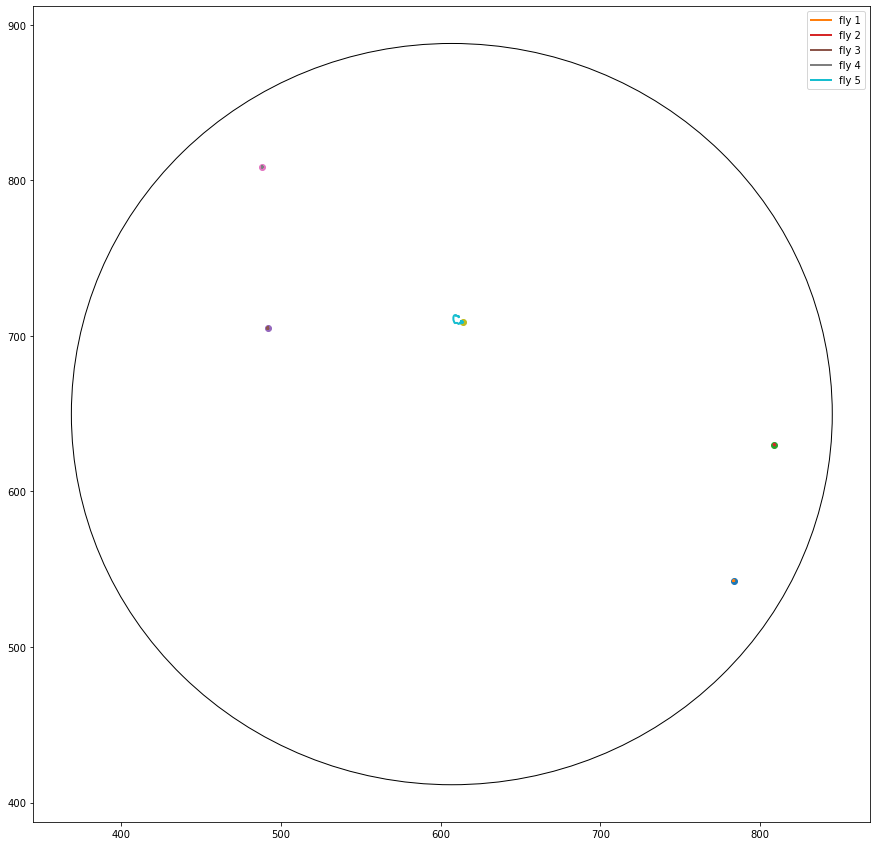

In [14]:
motra.fly_animation(fly[fly["fly_id"] <= 5], result_video_path="animation/sample_arena_1.mp4", video_size=10)

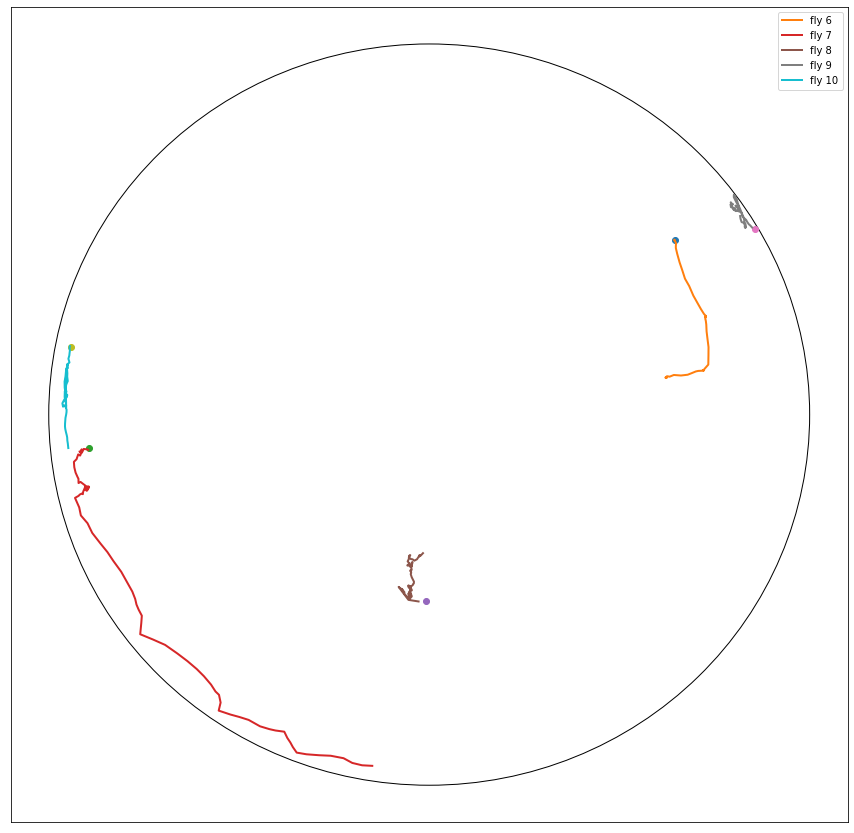

In [59]:
motra.fly_animation(fly[fly["fly_id"] > 5], result_video_path="animation/sample_arena_2.mp4", video_size=3)